In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist_.csv',low_memory=False)

In [4]:
df.head()

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
col_to_keep=[]
for i,col in enumerate(df.columns):
    if df.count()[i]==181691:
        col_to_keep.append(col)
     

In [6]:
df=df[col_to_keep]
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1.970000e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1.970000e+11,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1.970000e+11,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [7]:
dfr=pd.DataFrame(df.pivot_table(index=['region_txt'],aggfunc='size').sort_values(ascending=False),columns=['No of Attacks']).reset_index().rename(columns={'region_txt':'Region'})
dfr

,Region,No of Attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


<IPython.core.display.Javascript object>


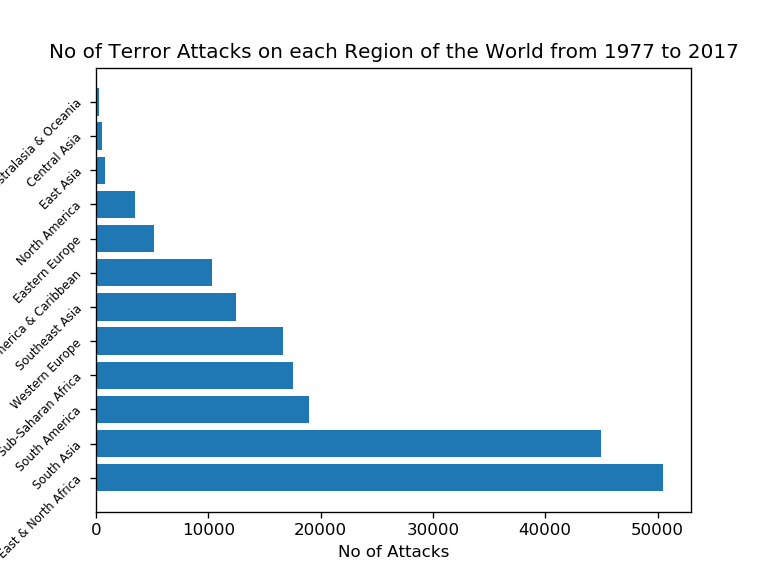

In [8]:
plt.figure()
plt.barh(dfr.Region,dfr['No of Attacks'])
plt.yticks(rotation=45)
ax=plt.gca()
plt.tick_params(axis='y',labelsize=7)
plt.xlabel('No of Attacks')
plt.ylabel('Region')
plt.title("No of Terror Attacks on each Region of the World from 1977 to 2017")
plt.show()

In [9]:
dfc=pd.DataFrame(df.pivot_table(index=['country_txt'],aggfunc='size').sort_values(ascending=False).head(15),columns=['No of Attacks']).reset_index().rename(columns={'country_txt':'Country'})
dfc

,Country,No of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


<IPython.core.display.Javascript object>


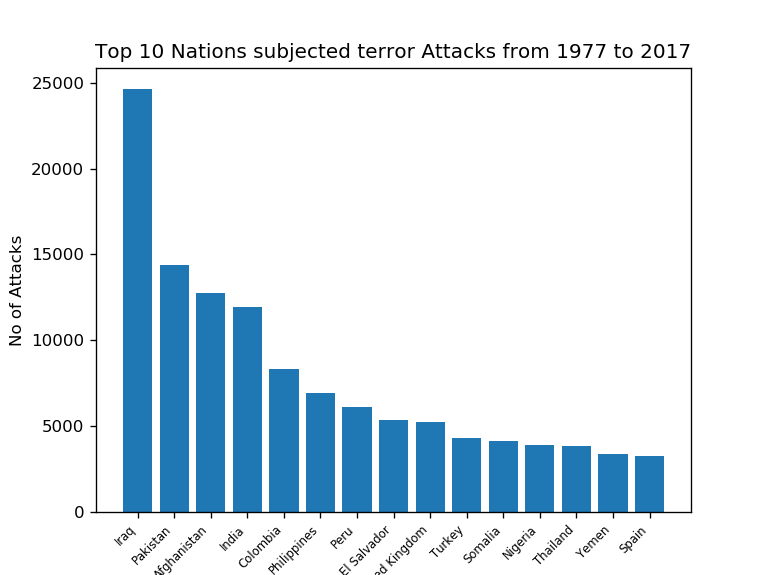

In [10]:
plt.figure()
plt.bar(dfc.Country,dfc['No of Attacks'])
plt.xticks(rotation=45,ha='right')
plt.ylabel('No of Attacks')
plt.xlabel('Country')
plt.title("Top 10 Nations subjected terror Attacks from 1977 to 2017")
plt.tick_params(axis='x',labelsize=7)
plt.show()

In [11]:
pd.DataFrame(df.pivot_table(index=[df.gname],aggfunc='size').sort_values(ascending=False).head(10)).reset_index().rename(columns={'gname':'Top 10 Gang Name',0:'No of Attacks'})

,Top 10 Gang Name,No of Attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [12]:
pd.DataFrame(df.pivot_table(index=[df.suicide,df.success],aggfunc='size')).rename({0:'No',1:'Yes'}).rename(columns={0:'No of Attacks','attacktype1_txt':'Target Type'})

No of Attacks
suicide success               
No      No               18994
        Yes             156064
Yes     No                1065
        Yes               5568

In [18]:
pd.DataFrame(df.pivot_table(index=[df.attacktype1_txt,df.success],aggfunc='size')).rename({0:'No',1:'Yes'}).reset_index().rename(columns={0:'No of Attacks','attacktype1_txt':'Attack type'}) 

,Attack type,success,No of Attacks
0,Armed Assault,No,2324
1,Armed Assault,Yes,40345
2,Assassination,No,4697
3,Assassination,Yes,14615
4,Bombing/Explosion,No,10725
5,Bombing/Explosion,Yes,77530
6,Facility/Infrastructure Attack,No,577
7,Facility/Infrastructure Attack,Yes,9779
8,Hijacking,No,80
9,Hijacking,Yes,579


In [19]:
pd.DataFrame(df.pivot_table(index=[df.targtype1_txt,df.success],aggfunc='size')).rename({0:'No',1:'Yes'}).reset_index().rename(columns={0:'No of Attacks','targtype1_txt':'Target type'}) 

,Target type,success,No of Attacks
0,Abortion Related,No,43
1,Abortion Related,Yes,220
2,Airports & Aircraft,No,207
3,Airports & Aircraft,Yes,1136
4,Business,No,1424
5,Business,Yes,19245
6,Educational Institution,No,389
7,Educational Institution,Yes,3933
8,Food or Water Supply,No,32
9,Food or Water Supply,Yes,285


In [16]:
pd.DataFrame(df.pivot_table(index=[df.weaptype1_txt,df.success],aggfunc='size')).rename({0:'No',1:'Yes'}).reset_index().rename(columns={0:'No of Attacks','weaptype1_txt':'weapon type'}) 

,weapon type,success,No of Attacks
0,Biological,No,20
1,Biological,Yes,15
2,Chemical,No,78
3,Chemical,Yes,243
4,Explosives,No,12680
5,Explosives,Yes,79746
6,Fake Weapons,No,15
7,Fake Weapons,Yes,18
8,Firearms,No,4434
9,Firearms,Yes,54090


In [17]:
pd.DataFrame(df.pivot_table(index=df.dbsource,aggfunc='size').sort_values(ascending=False)).reset_index().rename(columns={0:'No of times Informed','dbsource':'Source'})  

,Source,No of times Informed
0,START Primary Collection,78002
1,PGIS,63740
2,ISVG,17207
3,CETIS,16163
4,CAIN,1588
5,UMD Schmid 2012,1165
6,Hewitt Project,1005
7,UMD Algeria 2010-2012,848
8,UMD South Africa,449
9,UMD Sri Lanka 2011,405
